In [150]:
#Importing required libraries
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import word_tokenize
import string
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

In [151]:
text = fetch_20newsgroups()
print(type(text))

<class 'sklearn.utils.Bunch'>


In [152]:
text.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [153]:
print(text['DESCR'])
#To get an idea how our dataset is.

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [154]:
stopwords = pd.read_csv('C:/Users/admin/OneDrive/Desktop/stopwords.csv')
#downloaded a dataset of stopwords from the net

In [155]:
stop_words = np.array(stopwords.values)
stops = []
for i in stop_words:
    for j in i:
        stops.append(j)
punctuations = list(string.punctuation)
stops = stops + punctuations
print(len(stops))
#got all the stopwords in a list 

764


In [156]:
documents = text.data
categories = text.target
X = [word_tokenize(x) for x in documents]
Y = categories

In [157]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, random_state = 1)

In [158]:
words = []
for i in x_train:
    for word in i:
        if(word.lower() not in stops and len(word) != 1 and len(word) != 2 and all(i not in punctuations for i in word)):
            words.append(word)
print(len(words))
#seperated out the words we want to use as features for classification

1149089


In [159]:
dict = {}
for i in words:
    if i in dict.keys():
        dict[i] = dict[i] + 1
    else:
        dict[i] = 1
print(len(dict))
#got a count of the required words in a dictionary

98144


In [160]:
frequency = np.sort(np.array([i for i in dict.values()]))[::-1]
words = np.array([i for i in dict.keys()])
words = words[np.argsort(frequency)][::-1]
#got them arranged in descending order of occurance

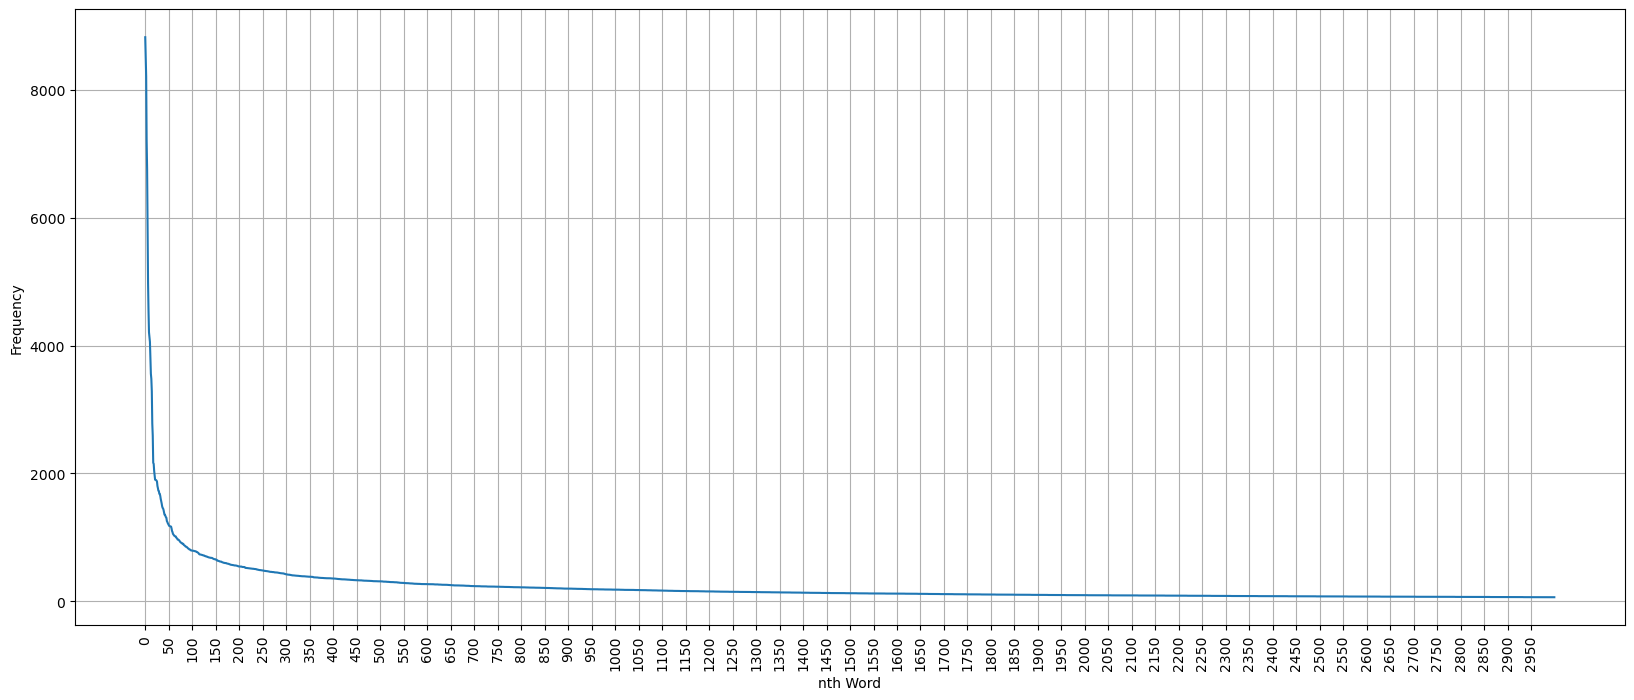

In [161]:
plt.figure(figsize = (20, 8))
plt.plot(np.arange(len(frequency))[0:3000], frequency[0:3000])
plt.xlabel('nth Word')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 3000, 50), rotation = 90)
plt.grid()
plt.show()

In [162]:
features = words[20:4000]
print(frequency[20], frequency[3999])
#we don't need the words occuring too many times or to lees as they will be useless as features

1972 46


In [163]:
def final_data(x, y):
    data = np.zeros((len(x), len(y)))
    for i in range(len(x)):
        for word in x[i]:
            if word in y:
                for j in range(len(y)):
                    if y[j] == word:
                        data[i][j] = data[i][j] + 1
    return data
#got the data in form of a 2D array where each row is a document and each column is a feature(word) and we have the count 

In [164]:
final_x_train = final_data(x_train, features)
final_x_test = final_data(x_test, features)

In [165]:
clf = MultinomialNB()
clf.fit(final_x_train, y_train)
clf.score(final_x_test, y_test)

0.7483209614704843

In [166]:
# Now creating our own Naive Bayes Classifier
def fit(x_train, y_train):
    count = {}
    for i in range(20):
        docs_of_cat_i = x_train[y_train == i]
        count[i] = {}
        count[i]['total'] = 0
        for j in range(len(features)):
            count[i][features[j]] = docs_of_cat_i[:, j].sum()
            count[i]['total'] = count[i]['total'] + count[i][features[j]]
    return count
#creates a dictionary of length equal to number of classifications as each represent a different classification and in them 
#another dictionary containing words and the total count as keys and their occurance in those documents as the values.

In [170]:
def probability(dic, x, current_class):
    prob_of_all_words = []
    for i in range(len(x)):
        if x[i] != 0:
            num = dic[current_class][features[i]]
            den = dic[current_class]['total']
            prob = np.log((num+1) / (den+len(x)))
            prob_of_all_words.append(prob)
    return sum(prob_of_all_words)

#It stores the probability of all words in the current document being accessed and returs their logarithemic sum. 

def pred_one(dic, x):
    classes = dic.keys()
    best_prob = -1
    best_class = -1
    q = True
    for current_class in classes:
        p = probability(dic, x, current_class)
        if(q or p > best_prob):
            best_prob = p
            best_class = current_class
        q = False
    return best_class

#It predicts which classification is best fit for the current document being accessed.

def pred(x_test, dic):
    y_pred = []
    for doc in x_test:
        y_pred.append(pred_one(dic, doc))
    return y_pred
#It creates an array of the predicted classifications of the documents in testing data.

In [168]:
dic = fit(final_x_train, y_train)

In [171]:
y_predicted = pred(final_x_test, dic)

In [173]:
from sklearn.metrics import confusion_matrix
for i in confusion_matrix(y_true = y_test, y_pred = y_predicted):
    for j in i:
        print(j, end = "    ")
    print()

83    0    0    0    0    0    0    0    0    0    0    0    1    4    0    10    1    6    2    7    
0    97    2    9    15    7    2    1    0    1    0    1    4    5    5    1    1    0    1    0    
0    30    54    23    6    17    1    2    1    0    0    0    5    0    0    0    0    0    0    0    
0    15    1    100    14    3    5    1    1    0    1    0    7    0    2    0    0    0    1    1    
0    5    1    15    95    1    4    2    2    0    0    0    9    2    1    0    0    1    0    0    
0    18    2    4    4    109    0    0    3    0    3    1    4    3    1    1    0    0    0    0    
1    3    0    8    2    0    108    1    1    1    3    0    7    5    3    0    0    4    0    0    
0    1    0    2    1    0    6    100    7    1    0    0    4    2    3    0    5    3    1    1    
0    0    0    0    0    0    3    3    114    0    1    0    1    2    1    1    3    2    0    0    
1    0    0    1    0    0    0    2    0    116    6    0    5    1

In [175]:
from sklearn.metrics import classification_report
print(classification_report(y_true = y_test, y_pred = y_predicted))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       114
           1       0.48      0.64      0.54       152
           2       0.90      0.39      0.54       139
           3       0.56      0.66      0.61       152
           4       0.65      0.69      0.67       138
           5       0.78      0.71      0.74       153
           6       0.77      0.73      0.75       147
           7       0.79      0.73      0.76       137
           8       0.84      0.87      0.86       131
           9       0.87      0.86      0.87       135
          10       0.82      0.87      0.84       136
          11       0.94      0.92      0.93       145
          12       0.60      0.59      0.60       157
          13       0.70      0.83      0.76       151
          14       0.82      0.81      0.81       155
          15       0.77      0.81      0.79       159
          16       0.74      0.84      0.78       140
          17       0.77    

In [ ]:
# We are getting an accuracy of 74%.
# It can be made better by better feature selection.
# And also the accuracy by my Naive Bayes classifier is same as the inbuilt Naive Bayes classifier